### Aim = To implement a Neural Network with one hidden layer


In [19]:
# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential

# Import loss function and numpy
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import numpy as np

In [20]:
# Load MNIST dataset from Keras datasets
from tensorflow.keras.datasets import mnist

In [21]:
# Load dataset into training and testing variables
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

# Flatten 28x28 images to 784-dimensional vectors and normalize to [0, 1]
train_data = train_data.reshape(-1, 784).astype('float32') / 255.0
test_data = test_data.reshape(-1, 784).astype('float32') / 255.0


In [22]:
# Define a Sequential model with input, hidden, and output layers
model = Sequential([
    layers.InputLayer(input_shape=(784,)),  # Input layer
    layers.Dense(64, activation='relu', name='l1'),  # Hidden layer 1 with ReLU
    layers.Dense(128, activation='relu', name='l2'),   # Hidden layer 2 with ReLU
    layers.Dense(10, activation='softmax', name='l3') # Output layer with softmax for 10 classes
])


In [23]:
# Print model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ l1 (Dense)                      │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ l2 (Dense)                      │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ l3 (Dense)                      │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,850 (233.79 KB)

 Trainable params: 59,850 (233.79 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Compile model with optimizer, loss, and metrics
model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


In [25]:
# Train the model for 5 epochs
model.fit(train_data, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8442 - loss: 0.5413
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9584 - loss: 0.1385
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9720 - loss: 0.0939
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9799 - loss: 0.0684
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9811 - loss: 0.0609


In [26]:
import matplotlib.pyplot as plt

# Take first two test images
sample_images = test_data[:2]
sample_labels = test_labels[:2]

# Get logits and convert to probabilities using softmax
logits = model(sample_images)
probabilities = tf.nn.softmax(logits)


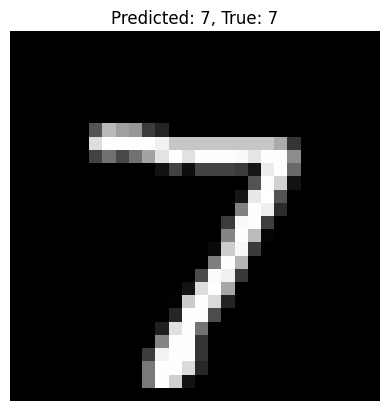

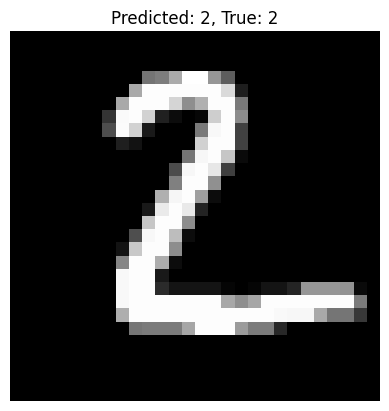

In [27]:
# Display predictions and true labels
for i in range(2):
    predicted_class = np.argmax(probabilities[i].numpy())
    true_class = sample_labels[i]
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_class}, True: {true_class}")
    plt.axis('off')
    plt.show()
